In [2]:
import pandas as pd
from math import sqrt
import seaborn as sns
import duckdb

query = """
select aei.ano, aei.mes, count(*) as atendimentos
from main.atendimentos_em_ijui aei 
group by aei.ano, aei.mes 
order by aei.ano asc, aei.mes 
"""

In [43]:
database = duckdb.connect("database/database_pi.db")

rows = database.query(query).fetchall()

In [15]:
dataframe = pd.read_csv("proportions.csv")

dataframe["proporcao"] = dataframe["depressao"] / dataframe["total"]

In [23]:
# dataframe = pd.DataFrame(rows, columns=["ano","mes","atendimentos"])

print(f"Colunas para usar na análise logo abaixo {list(dataframe.columns)}")


# dataframe = dataframe.query("atendimentos > 500")
print(dataframe.head(10))

column_x = "ano"
column_y = "proporcao"

Colunas para usar na análise logo abaixo ['total', 'depressao', 'ano', 'proporcao']
   total  depressao   ano  proporcao
0  13452        668  2014   0.049658
1  65994       6810  2015   0.103191
2  94558      15080  2016   0.159479
3  55974       4120  2017   0.073606
4  42960       3254  2018   0.075745
5  47472       6002  2019   0.126432
6  37684       5382  2020   0.142819
7  12440       1444  2021   0.116077
8  78982       7770  2023   0.098377


In [25]:
# COLOQUE AS COLUNAS QUE VC QUER USAR NESSE LUGAR AQUI Ó
try:    
    list_x = list(dataframe[column_x])
    list_y = list(dataframe[column_y])

    
except: 
    list_x = list(dataframe[dataframe.columns[3]])
    list_y = list(dataframe[dataframe.columns[4]])

n = len(dataframe)
print(f"\nN = {n}")

sum_of_x = sum(list_x)
print(f"Somatório de X = {sum_of_x}")
sum_of_y = sum(list_y)
print(f"Somatório de Y = {sum_of_y}")

sum_of_squared_x = sum([*map(lambda x : x**2, list_x)])
print(f"Somatório de X ao quadrado = {sum_of_squared_x}")
sum_of_squared_y = sum([*map(lambda y : y**2, list_y)])
print(f"Somatório de Y ao quadrado = {sum_of_squared_y}")

sum_of_xy = 0

for i in range(n):
    sum_of_xy += list_x[i] * list_y[i]

print(f"Somatório de X e Y = {sum_of_xy}")

part1 = sum_of_xy - ((sum_of_x * sum_of_y)/n)
print(f"\npart1 = {part1}")

part2 = sqrt(sum_of_squared_x - ((sum_of_x**2)/n))
print(f"part2 = {part2}")

part3 = sqrt(sum_of_squared_y - ((sum_of_y**2)/n))
print(f"part3 = {part3}\n")


correlation_coeficient = part1 / (part2 * part3)

print(f"Coeficiente de Correlação é = {correlation_coeficient}")


N = 9
Somatório de X = 18163
Somatório de Y = 0.9453842352822319
Somatório de X ao quadrado = 36655021
Somatório de Y ao quadrado = 0.10923732053897674
Somatório de X e Y = 1908.1368043775356

part1 = 0.2463748851823766
part2 = 8.299933065275951
part3 = 0.0996574870525264

Coeficiente de Correlação é = 0.29785981332968653


In [26]:
b = ((n* sum_of_xy) - (sum_of_x * sum_of_y)) / ((n * sum_of_squared_x) - (sum_of_x ** 2))

print(f"Valor b é = {b}")

a = (sum_of_y / n) - (b * (sum_of_x/n))
print(f"Valor a é = {a}")

determination_coeficient = (correlation_coeficient ** 2) * 100
print(f"Valor do Coeficiente de Determinação = {determination_coeficient}\n")

print(f"ou seja, a equação de reta que melhor Representa o conjunto de dados, é: \n\nY = {round(a,2)} + {round(b,2)}*x \n")
print(f"e ela representa o conjunto de dados em {round(determination_coeficient, 2)}%")

Valor b é = 0.003576409623618078
Valor a é = -7.112549306499213
Valor do Coeficiente de Determinação = 8.87204683967957

ou seja, a equação de reta que melhor Representa o conjunto de dados, é: 

Y = -7.11 + 0.0*x 

e ela representa o conjunto de dados em 8.87%


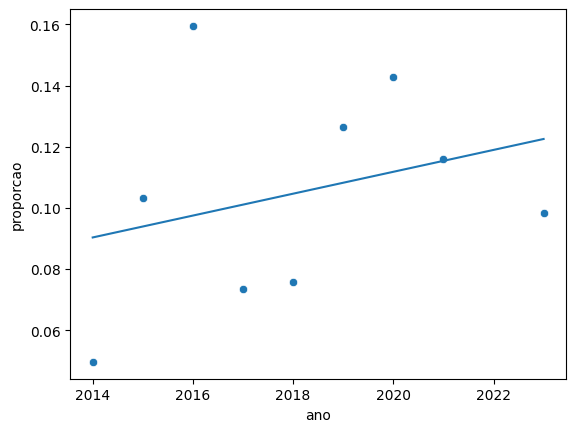

In [27]:
values_list_for_line = {}
for x in list_x:
    values_list_for_line[x] = (a+ b*x)

sns.scatterplot(data=dataframe, x=column_x,y=column_y)
sns.lineplot(data=values_list_for_line)
